https://github.com/secoba/pandas-official-tutorials-zh/blob/master/1.md
中文测试

In [1]:
#引入包
import numpy as np
import pandas as pd

In [2]:
# 创建对象
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# 通过传递一个numap array, 时间索引以及列标签来创建一个DataFrame
# 时期–period
dates = pd.date_range('20130101', periods=6)
dates
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.059346,0.428461,0.771164,0.423302
2013-01-02,-0.250375,0.733617,-2.220983,0.696549
2013-01-03,0.237575,0.221165,-1.871808,-0.268389
2013-01-04,-0.848854,-0.719292,-0.155037,-0.593112
2013-01-05,-0.272927,-0.727651,-0.173433,-1.290932
2013-01-06,0.332345,0.639660,1.577506,0.655596


In [4]:
# 则randn生成一个 shape 数组，其中填充从均值 0 和方差 1 的单变量“正态”（高斯）分布采样的随机浮点数
np.random.randn(6, 4)

array([[-0.98109791, -1.10634697,  1.20878237, -0.5924438 ],
       [-0.33889084,  1.50200034, -0.34207074,  2.70075792],
       [-0.48477799,  0.11619385, -1.74292972,  1.84353584],
       [-0.51846296, -0.01199738,  0.51369515,  0.31969364],
       [-0.29870162, -0.41862307,  1.53651852,  1.12082054],
       [-0.18582374, -0.8565421 , -0.17954768, -1.4736177 ]])

In [5]:
# 通过传递一个能够被转换成类似序列结构的字典对象来创建一个DataFrame
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# 查看不同列的数据类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
# 如果你使用的是IPython,使用Tab自动补全功能会识别所有的属性以及自定义的列，下图中是所有能够被自动识别的属性的一个子集
#df2.<TAB>

In [8]:
# 查看DataFrame中头部行数据
df.head()

,A,B,C,D
2013-01-01,-0.059346,0.428461,0.771164,0.423302
2013-01-02,-0.250375,0.733617,-2.220983,0.696549
2013-01-03,0.237575,0.221165,-1.871808,-0.268389
2013-01-04,-0.848854,-0.719292,-0.155037,-0.593112
2013-01-05,-0.272927,-0.727651,-0.173433,-1.290932


In [9]:
# 尾部
df.tail(3)

,A,B,C,D
2013-01-04,-0.848854,-0.719292,-0.155037,-0.593112
2013-01-05,-0.272927,-0.727651,-0.173433,-1.290932
2013-01-06,0.332345,0.639660,1.577506,0.655596


In [10]:
#显示索引、列和底层的numpy数据
df.index
df.columns
df.values

array([[-0.0593464 ,  0.42846089,  0.77116366,  0.42330247],
       [-0.25037451,  0.73361736, -2.22098253,  0.69654881],
       [ 0.23757532,  0.22116523, -1.87180768, -0.26838908],
       [-0.84885401, -0.71929161, -0.15503742, -0.59311228],
       [-0.27292662, -0.72765085, -0.17343324, -1.29093156],
       [ 0.33234477,  0.63966015,  1.57750594,  0.65559559]])

In [11]:
# describe()函数对于数据的快速统计汇总：
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.143597,0.095994,-0.345432,-0.062831
std,0.425306,0.659002,1.473623,0.795085
min,-0.848854,-0.727651,-2.220983,-1.290932
25%,-0.267289,-0.484177,-1.447214,-0.511931
50%,-0.154860,0.324813,-0.164235,0.077457
75%,0.163345,0.586860,0.539613,0.597522
max,0.332345,0.733617,1.577506,0.696549


In [12]:
#对数据的转置
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.059346,-0.250375,0.237575,-0.848854,-0.272927,0.332345
B,0.428461,0.733617,0.221165,-0.719292,-0.727651,0.639660
C,0.771164,-2.220983,-1.871808,-0.155037,-0.173433,1.577506
D,0.423302,0.696549,-0.268389,-0.593112,-1.290932,0.655596


In [13]:
# 按轴进行排序
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.423302,0.771164,0.428461,-0.059346
2013-01-02,0.696549,-2.220983,0.733617,-0.250375
2013-01-03,-0.268389,-1.871808,0.221165,0.237575
2013-01-04,-0.593112,-0.155037,-0.719292,-0.848854
2013-01-05,-1.290932,-0.173433,-0.727651,-0.272927
2013-01-06,0.655596,1.577506,0.639660,0.332345


In [84]:
# 按值进行排序
df.sort_values(by='A')

,A,B,C,D,E
0,one,A,foo,1.469484,1.635029
1,one,B,foo,-0.103904,0.005369
4,one,B,bar,-0.624916,-1.547955
5,one,C,bar,0.811104,0.579376
8,one,C,foo,-2.164401,0.411625
9,one,A,bar,-0.227303,-0.467691
3,three,A,bar,2.197993,0.522320
7,three,B,foo,-0.107214,0.192611
11,three,C,bar,-1.139284,0.511508
2,two,C,foo,-0.779242,-0.268199


In [15]:
# 选择一个单独的列，这将会返回一个Series,等同于df.A
#df.A
df['A']

2013-01-01   -0.059346
2013-01-02   -0.250375
2013-01-03    0.237575
2013-01-04   -0.848854
2013-01-05   -0.272927
2013-01-06    0.332345
Freq: D, Name: A, dtype: float64

In [16]:
# 通过[]进行选择，这将会对行进行切片
df[0:3]
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.250375,0.733617,-2.220983,0.696549
2013-01-03,0.237575,0.221165,-1.871808,-0.268389
2013-01-04,-0.848854,-0.719292,-0.155037,-0.593112


In [17]:
#使用标签来获取一个交叉的区域
df.loc[dates[0]]

A   -0.059346
B    0.428461
C    0.771164
D    0.423302
Name: 2013-01-01 00:00:00, dtype: float64

In [18]:
# 通过标签在多个轴上进行选择
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.059346,0.428461
2013-01-02,-0.250375,0.733617
2013-01-03,0.237575,0.221165
2013-01-04,-0.848854,-0.719292
2013-01-05,-0.272927,-0.727651
2013-01-06,0.332345,0.639660


In [19]:
# 标签切片
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.250375,0.733617
2013-01-03,0.237575,0.221165
2013-01-04,-0.848854,-0.719292


In [20]:
# 对于返回的对象进行维度缩减
df.loc['20130102', ['A', 'B']]
# df.T.loc[['A', 'B'], '20130102']

A   -0.250375
B    0.733617
Name: 2013-01-02 00:00:00, dtype: float64

In [21]:
# 获取一个标量
df.loc[dates[0], 'A']

-0.05934639592599349

In [22]:
# 快速方法一个标量（与上一个方法等价）
df.at[dates[0], 'A']

-0.05934639592599349

In [23]:
# 通过位置选择
#通过传递数值进行位置选择（选择的是行）
df.iloc[3]

A   -0.848854
B   -0.719292
C   -0.155037
D   -0.593112
Name: 2013-01-04 00:00:00, dtype: float64

In [24]:
# 通过数值进行切片，与numpy/python中情况类似
df.iloc[3:5, 0:2]
# df.loc[:'20130102', ['A']]

,A,B
2013-01-04,-0.848854,-0.719292
2013-01-05,-0.272927,-0.727651


In [25]:
# 对列进行切片
df.iloc[:, 1:3]

,B,C
2013-01-01,0.428461,0.771164
2013-01-02,0.733617,-2.220983
2013-01-03,0.221165,-1.871808
2013-01-04,-0.719292,-0.155037
2013-01-05,-0.727651,-0.173433
2013-01-06,0.639660,1.577506


In [26]:
#获取特定的值
df.iloc[1, 1]  # 二位表也就是坐标咯

0.7336173618384189

In [27]:
#快速访问标量（等同于前一个方法）：
df.iat[1, 1]

0.7336173618384189

In [28]:
#布尔索引
#使用一个单独列的值来选择数据：
df[df.A > 0]

,A,B,C,D
2013-01-03,0.237575,0.221165,-1.871808,-0.268389
2013-01-06,0.332345,0.639660,1.577506,0.655596


In [29]:
#使用where操作来选择数据
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.428461,0.771164,0.423302
2013-01-02,NaN,0.733617,NaN,0.696549
2013-01-03,0.237575,0.221165,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.332345,0.639660,1.577506,0.655596


In [30]:
# 使用isin()方法来过滤
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.237575,0.221165,-1.871808,-0.268389,two
2013-01-05,-0.272927,-0.727651,-0.173433,-1.290932,four


In [31]:
#何止一个新的列
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.059346,0.428461,0.771164,0.423302,NaN
2013-01-02,-0.250375,0.733617,-2.220983,0.696549,1.0
2013-01-03,0.237575,0.221165,-1.871808,-0.268389,2.0
2013-01-04,-0.848854,-0.719292,-0.155037,-0.593112,3.0
2013-01-05,-0.272927,-0.727651,-0.173433,-1.290932,4.0
2013-01-06,0.332345,0.639660,1.577506,0.655596,5.0


In [32]:
# 通过标签设置新的值
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.428461,0.771164,0.423302,NaN
2013-01-02,-0.250375,0.733617,-2.220983,0.696549,1.0
2013-01-03,0.237575,0.221165,-1.871808,-0.268389,2.0
2013-01-04,-0.848854,-0.719292,-0.155037,-0.593112,3.0
2013-01-05,-0.272927,-0.727651,-0.173433,-1.290932,4.0
2013-01-06,0.332345,0.639660,1.577506,0.655596,5.0


In [33]:
#通过位置设置新的值
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.771164,0.423302,NaN
2013-01-02,-0.250375,0.733617,-2.220983,0.696549,1.0
2013-01-03,0.237575,0.221165,-1.871808,-0.268389,2.0
2013-01-04,-0.848854,-0.719292,-0.155037,-0.593112,3.0
2013-01-05,-0.272927,-0.727651,-0.173433,-1.290932,4.0
2013-01-06,0.332345,0.639660,1.577506,0.655596,5.0


In [34]:
#通过一个numpy数组设置一组新值
df.loc[:, 'D'] = np.array([5] * len(df))
df
# len(df)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.771164,5,NaN
2013-01-02,-0.250375,0.733617,-2.220983,5,1.0
2013-01-03,0.237575,0.221165,-1.871808,5,2.0
2013-01-04,-0.848854,-0.719292,-0.155037,5,3.0
2013-01-05,-0.272927,-0.727651,-0.173433,5,4.0
2013-01-06,0.332345,0.639660,1.577506,5,5.0


In [35]:
#通过where操作来设置新值
df2 = df.copy()
df2[df2 > 0] = -df2  # 都赋值为负数
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.771164,-5,NaN
2013-01-02,-0.250375,-0.733617,-2.220983,-5,-1.0
2013-01-03,-0.237575,-0.221165,-1.871808,-5,-2.0
2013-01-04,-0.848854,-0.719292,-0.155037,-5,-3.0
2013-01-05,-0.272927,-0.727651,-0.173433,-5,-4.0
2013-01-06,-0.332345,-0.639660,-1.577506,-5,-5.0


In [36]:
# 缺失值处理
# reindex()方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])  # columns 列增加
df1.loc[dates[0]:dates[1], 'E'] = 1
df1
# df.columns

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.771164,5,NaN,1.0
2013-01-02,-0.250375,0.733617,-2.220983,5,1.0,1.0
2013-01-03,0.237575,0.221165,-1.871808,5,2.0,NaN
2013-01-04,-0.848854,-0.719292,-0.155037,5,3.0,NaN


Pandas中loc和iloc函数用法详解（源码+实例）
https://blog.csdn.net/W_weiying/article/details/81411257

In [37]:
# 去掉包含缺失值的行
df1.dropna(how='any')  # how

,A,B,C,D,F,E
2013-01-02,-0.250375,0.733617,-2.220983,5,1.0,1.0


In [38]:
# 对缺失值进行填充
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.771164,5,5.0,1.0
2013-01-02,-0.250375,0.733617,-2.220983,5,1.0,1.0
2013-01-03,0.237575,0.221165,-1.871808,5,2.0,5.0
2013-01-04,-0.848854,-0.719292,-0.155037,5,3.0,5.0


In [39]:
# 对数据进行布尔填充
pd.isnull(df1)  # 可见程序返回了布尔值，该处为缺失值，返回True，该处不为缺失值，则返回False
# df1

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [40]:
# 统计
# 执行描述性统计
df.mean()  #即按轴方向求平均，得到每列数据的平均值

A   -0.133706
B    0.024583
C   -0.345432
D    5.000000
F    3.000000
dtype: float64

In [41]:
# 在其他轴上进行相同的操作
df.mean(1)

2013-01-01    1.442791
2013-01-02    0.852452
2013-01-03    1.117387
2013-01-04    1.255363
2013-01-05    1.565198
2013-01-06    2.509902
Freq: D, dtype: float64

In [42]:
# 对于拥有不同维度，需要对齐的对象进行操作。Pandas会自动的沿着指定的维度进行广播。
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)  # shift函数是对数据进行移动的操作
s
# df
df.sub(s, axis='index')  #sub()函数用于查找数据帧和其他逐元素的减法

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.762425,-0.778835,-2.871808,4.0,1.0
2013-01-04,-3.848854,-3.719292,-3.155037,2.0,0.0
2013-01-05,-5.272927,-5.727651,-5.173433,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [43]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.771164,5,NaN
2013-01-02,-0.250375,0.733617,-2.220983,5,1.0
2013-01-03,0.237575,0.221165,-1.871808,5,2.0
2013-01-04,-0.848854,-0.719292,-0.155037,5,3.0
2013-01-05,-0.272927,-0.727651,-0.173433,5,4.0
2013-01-06,0.332345,0.639660,1.577506,5,5.0


In [44]:
# 对数据应用函数
df.apply(np.cumsum)
df.apply(lambda x: x.max() - x.min())

A    1.181199
B    1.461268
C    3.798488
D    0.000000
F    4.000000
dtype: float64

In [45]:
# 直方图
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    1
2    0
3    2
4    3
5    3
6    2
7    4
8    0
9    0
dtype: int64

In [46]:
s.value_counts()  # 统计值出现的次数

0    3
2    2
3    2
5    1
1    1
4    1
dtype: int64

In [47]:
#字符串方法
# Series对象在其str属性中配备了一组字符串处理方法，可以很容易的应用到数组中的每个元素，如下段代码所示。更多详情请参考：字符串向量化方法。
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()  # lower 转换成小写

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [48]:
# 合并
# Pandas 提供了大量的方法能够轻松的对Series，DataFrame和Panel对象进行各种符合各种逻辑关系的合并操作。具体请参阅：合并。
df = pd.DataFrame(np.random.randn(10, 4))
df
pieces = [df[:3], df[3:7], df[7:]]
pieces
pd.concat(pieces)

,0,1,2,3
0,-0.536435,-0.503085,-0.810950,0.157894
1,-1.095591,-0.798638,1.069729,-0.253019
2,-1.327263,0.385502,-2.123236,0.496152
3,0.364058,1.275680,-0.011689,-0.054573
4,0.681590,-1.797769,-1.272188,-0.877944
5,-0.139056,-1.020085,-0.504517,1.307444
6,-0.882217,1.183585,0.436115,-1.193500
7,-0.214969,-0.321814,0.213585,0.935638
8,-1.808835,-1.085696,-1.683536,0.414420
9,0.149066,-2.458821,-0.096353,-1.408074


In [49]:
#join 类似于SQL类型的合并
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left
right
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [50]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [51]:
# Append
# 将一行连接到一个DataFrame上
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df
s = df.iloc[3]
s
df.append(s, ignore_index=True)

,A,B,C,D
0,0.283105,-1.159906,-0.738356,-1.267702
1,-1.139344,0.308754,-1.134025,-0.220767
2,0.392548,-0.033842,-0.739340,-1.396956
3,0.594832,0.105597,0.937614,-1.861389
4,-0.898604,0.210384,0.605002,0.035217
5,0.134199,0.190775,-0.576982,-0.630454
6,-0.134303,0.345174,-1.991558,-2.406770
7,-0.639529,-1.465691,-0.922659,0.712550
8,0.594832,0.105597,0.937614,-1.861389


In [52]:
#分组
# 对于group by 操作，我们通常是指以下一个或多个操作步骤：
# Splitting 按照一些规则将数据分成不同的组；
# Appliying 对于每组数据分别执行一个函数；
# Combining 将结果组合到一个数据结构中；
# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'tree'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,2.011013,-0.333495
1,bar,one,0.729974,-1.624074
2,foo,two,0.738597,-0.222590
3,bar,three,1.444548,-1.114942
4,foo,two,-0.940464,-0.659181
5,bar,two,0.969700,1.617241
6,foo,one,0.090294,1.437129
7,foo,tree,0.661418,-1.039162


In [53]:
# 分组并对每个分组执行sum函数
df.groupby('A').sum()

,C,D
A,,
bar,3.144222,-1.121776
foo,2.560857,-0.817299


In [54]:
# 通过多个列分组形成一个层次索引，然后执行函数：
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.729974 -1.624074
    three  1.444548 -1.114942
    two    0.969700  1.617241
foo one    2.101307  1.103634
    tree   0.661418 -1.039162
    two   -0.201867 -0.881772

In [55]:
#改变形状
#Stack
#zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
# 如果各个迭代器的元素个数不一致，则返回列表长度与最短的对象相同，利用 * 号操作符，可以将元组解压为列表。
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.395419  0.245138
      two     0.845712 -0.598740
baz   one     0.511443 -0.335292
      two     0.807135  2.290919

In [56]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.395419
               B    0.245138
       two     A    0.845712
               B   -0.598740
baz    one     A    0.511443
               B   -0.335292
       two     A    0.807135
               B    2.290919
dtype: float64

In [57]:
stacked.unstack()  # 解压缩

A         B
first second                    
bar   one     1.395419  0.245138
      two     0.845712 -0.598740
baz   one     0.511443 -0.335292
      two     0.807135  2.290919

In [58]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.395419  0.845712
      B  0.245138 -0.598740
baz   A  0.511443  0.807135
      B -0.335292  2.290919

In [59]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.395419  0.511443
       B  0.245138 -0.335292
two    A  0.845712  0.807135
       B -0.598740  2.290919

In [67]:
# 数据透视表
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.469484,1.635029
1,one,B,foo,-0.103904,0.005369
2,two,C,foo,-0.779242,-0.268199
3,three,A,bar,2.197993,0.522320
4,one,B,bar,-0.624916,-1.547955
5,one,C,bar,0.811104,0.579376
6,two,A,foo,-1.922461,0.501023
7,three,B,foo,-0.107214,0.192611
8,one,C,foo,-2.164401,0.411625
9,one,A,bar,-0.227303,-0.467691


In [68]:
# 可以从这个数据中轻松生成数据透视表
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
# data: 一个数据帧对象。
# values：要聚合的列或列列表。
# index: 列、Grouper、与数据长度相同的数组或它们的列表。在数据透视表索引上分组的键。如果传递了一个数组，它的使用方式与列值相同。
# columns: 列、Grouper、与数据长度相同的数组或它们的列表。在数据透视表列上分组的键。如果传递了一个数组，它的使用方式与列值相同。
# aggfunc: 用于聚合的函数，默认为numpy.mean.
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
# df = pd.pivot_table(df, index=['A'])
# df.to_csv('a.csv')

C             bar       foo
A     B                    
one   A -0.227303  1.469484
      B -0.624916 -0.103904
      C  0.811104 -2.164401
three A  2.197993       NaN
      B       NaN -0.107214
      C -1.139284       NaN
two   A       NaN -1.922461
      B -0.928717       NaN
      C       NaN -0.779242

In [80]:
# https://zhuanlan.zhihu.com/p/31952948
pd.pivot_table(df.query('A==["one"]'), index=['A'], values=['D'], columns=['C'], aggfunc=[np.sum, np.mean])

sum                mean          
            D                   D          
C         bar       foo       bar       foo
A                                          
one -0.041115 -0.798821 -0.013705 -0.266274

In [1]:
# python 支持多少EXCEL函数
from openpyxl.utils import FORMULAE

print(FORMULAE)

frozenset({'TIMEVALUE', 'GAMMADIST', 'GESTEP', 'CUBEMEMBER', 'COMBIN', 'ODDLPRICE', 'GROWTH', 'SUMX2MY2', 'FDIST', 'ODDLYIELD', 'GCD', 'COUNTA', 'CONVERT', 'BIN2DEC', 'COUPNUM', 'MDETERM', 'ECMA.CEILING', 'CUMIPMT', 'BIN2HEX', 'SKEW', 'EXACT', 'YIELDDISC', 'SIGN', 'COUNTBLANK', 'PEARSON', 'IMABS', 'ERF', 'INTRATE', 'PRICE', 'FIND', 'NORMSINV', 'COMPLEX', 'DATEVALUE', 'MATCH', 'CUMPRINC', 'ISREF', 'JIS', 'SLOPE', 'BINOMDIST', 'ISERROR', 'SUBTOTAL', 'HEX2OCT', 'MINVERSE', 'UPPER', 'FINDB', 'RIGHT', 'MIN', 'COUPDAYS', 'KURT', 'ISERR', 'COSH', 'IMDIV', 'MMULT', 'ATAN2', 'ATAN', 'SIN', 'IMSUB', 'IMPOWER', 'CHIINV', 'ROMAN', 'RANDBETWEEN', 'MOD', 'ODDFYIELD', 'IPMT', 'MDURATION', 'DOLLAR', 'TBILLEQ', 'COUPNCD', 'AREAS', 'BETADIST', 'EXP', 'T', 'ACOS', 'FIXED', 'SUM', 'PERCENTRANK', 'ASIN', 'TRANSPOSE', 'CUBESET', 'DOLLARDE', 'MINUTE', 'ASC', 'NORMSDIST', 'NETWORKDAYS.INTL', 'HARMEAN', 'RAND', 'LENB', 'AVERAGEA', 'HEX2BIN', 'VALUE', 'SEARCHB', 'ERROR.TYPE', 'CUBEVALUE', 'TANH', 'EOMONTH', 'SE

In [3]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, 'Hello World!')
pdf

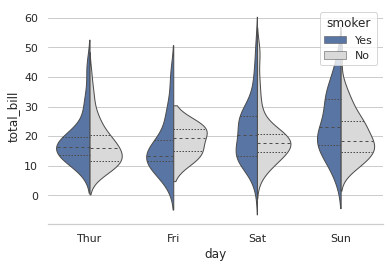

In [11]:

import seaborn as sns

sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
a = sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
                   split=True, inner="quart", linewidth=1,
                   palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)
# 这个居然没有代码提示，不过可以运行哈哈哈
# a.get_figure().savefig('1.png') #输出图片